In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [29]:
df = pd.read_csv("heart_disease_risk.csv")
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [30]:
df = df.drop_duplicates()

In [31]:
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [32]:
df['Age']

,Age
0,48.0
1,46.0
2,66.0
3,60.0
4,69.0
...,...
69994,29.0
69995,30.0
69997,53.0
69998,57.0


# **Question 1: How Do Age, Smoking, And Diabetes Influence Heart Disease Risk**

<ipython-input-33-601c0ab23c30>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk = df.groupby('Age_Group')['Heart_Risk'].mean() ###Group data by Age_Group and calculate average heart risk


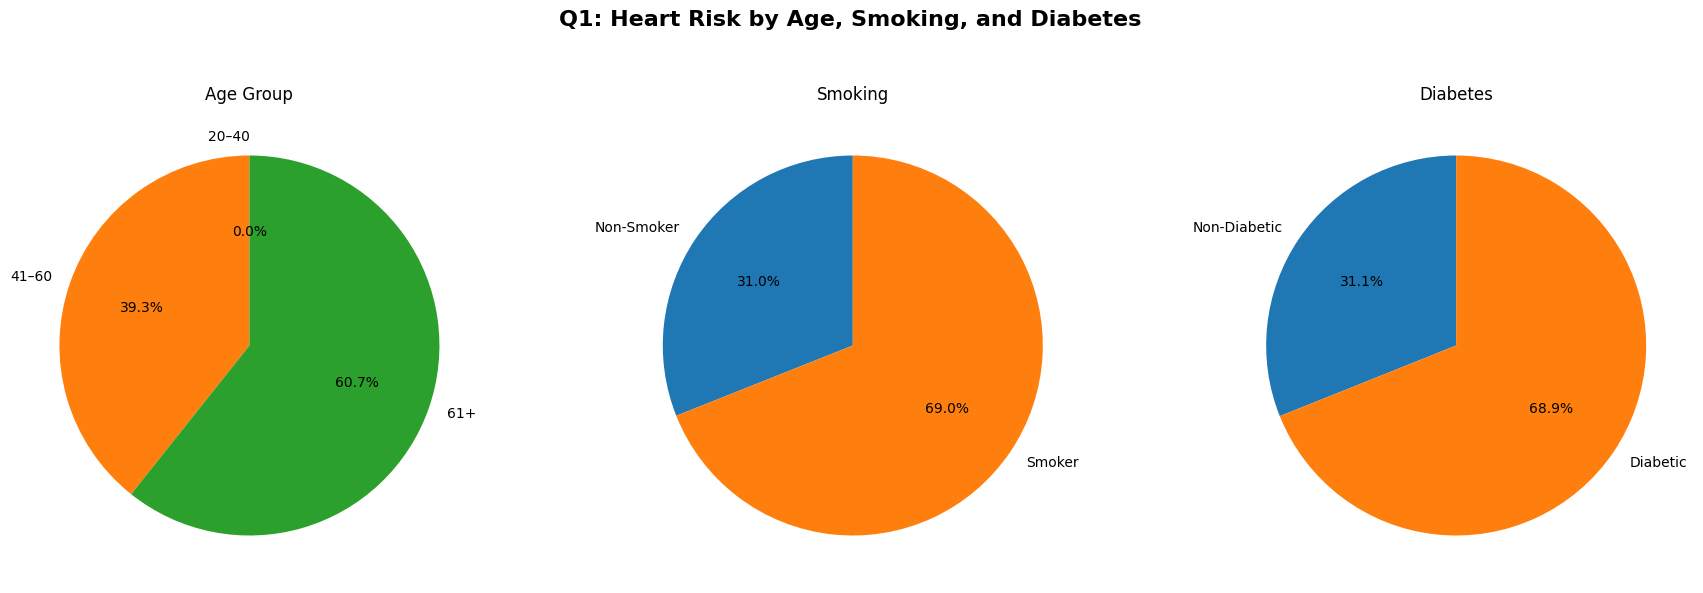

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) ##Create a figure with 1 row and 3 columns
fig.suptitle("Q1: Heart Risk by Age, Smoking, and Diabetes", fontsize=16, fontweight='bold')

### Pie 1: Age Group ###
df['Age_Group'] = pd.cut(df['Age'], bins=[19, 40, 60, 100], labels=["20–40", "41–60", "61+"])
age_risk = df.groupby('Age_Group')['Heart_Risk'].mean() ###Group data by Age_Group and calculate average heart risk
axes[0].pie(age_risk, labels=age_risk.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Age Group")

### Pie 2: Smoking ###
smoke_risk = df.groupby('Smoking')['Heart_Risk'].mean() ###Group data by Smoking(0 == Non-Smoker, 1 == Smoker) and calculate average heart risk
axes[1].pie(smoke_risk, labels=["Non-Smoker", "Smoker"], autopct='%1.1f%%', startangle=90)
axes[1].set_title("Smoking")

### Pie 3: Diabetes ###
diabetes_risk = df.groupby('Diabetes')['Heart_Risk'].mean() ###Group data by Diabetes and calculate average heart risk
axes[2].pie(diabetes_risk, labels=["Non-Diabetic", "Diabetic"], autopct='%1.1f%%', startangle=90)
axes[2].set_title("Diabetes")

plt.tight_layout(rect=[0, 0, 1, 0.9])  ###This adjust layout so nothing overlaps
plt.show()

## **Question 2: Which Machine Learning Model Provides the Most Accurate Prediction of Heart Disease Risk?**

In [34]:
X = df.drop(columns=['Heart_Risk','Age_Group']) ###All columns except the target
y = df['Heart_Risk'] ###What we are trying to predict

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
models = {"Logistic Regression" : LogisticRegression(max_iter=1000), "Decision Tree" : DecisionTreeClassifier(), "Random Forest" : RandomForestClassifier()} ###Store all the three models in a dictionary to Loop through

In [40]:
for name, model in models.items():
  model.fit(X_train, y_train) ###Train the model with training data
  y_pred = model.predict(X_test) ###Make predictions on the test data
  accuracy = accuracy_score (y_test, y_pred) ###Calculate accuracy score

  print(f"\n{name} Accuracy:{accuracy:4f}") ###We want to use this to show the accuracy


Logistic Regression Accuracy:0.992706

Decision Tree Accuracy:0.982041

Random Forest Accuracy:0.993412


*   Logistic Regression = 99.3%
* Decision Tree = 98.2%
*Random Forest = 99.3%



## **Question3: Which Symptoms And Risk Factors Are The Main Cause Of Heart Disease?**

In [41]:
forest_model = models['Random Forest'] ###Using the Random Forest model gives us access to its feature importances

In [43]:
importances = forest_model.feature_importances_ ###This pulls out the importance values and match them to feature anmes
features = X.columns

In [44]:
importance_df = pd.DataFrame({'Feature':features, "Importance":importances}).sort_values(by='Importance', ascending=False) ###For easy sorting and display, we will put it into DataFrame

In [45]:
### Top 10 Features ###
print("\n Top 10 Most Important Features:")
print(importance_df.head(10))


 Top 10 Most Important Features:
                Feature  Importance
17                  Age    0.165151
7    Cold_Sweats_Nausea    0.112513
5              Swelling    0.101567
4             Dizziness    0.095463
2               Fatigue    0.095446
6    Pain_Arms_Jaw_Back    0.094145
0            Chest_Pain    0.091451
3          Palpitations    0.074888
1   Shortness_of_Breath    0.070614
13  Sedentary_Lifestyle    0.016079


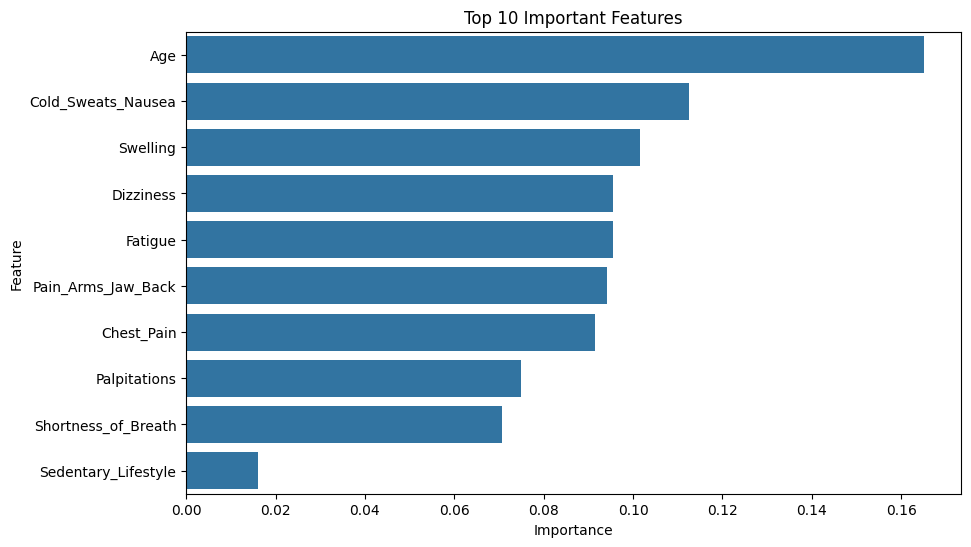

In [47]:
plt.figure(figsize = (10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()

## **Question 4: Which Gender Has A Higher Risk Of Developing Heart Disease**

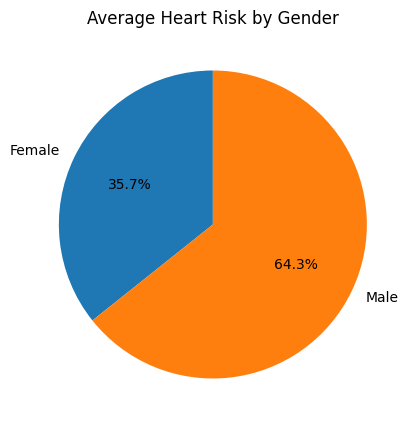

In [52]:
gender_risk = df.groupby('Gender')['Heart_Risk'].mean()
plt.figure(figsize = (5,5))
plt.pie(gender_risk, labels = ["Female", "Male"],autopct = '%1.1f%%', startangle=90)
plt.title("Average Heart Risk by Gender")
plt.show()